In [ ]:
!pip install validclust

# **K-Means**

In [ ]:

import numpy as np
import random
import tensorflow as tf
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score
import cv2
import keras
from validclust import dunn
import matplotlib.pyplot as plt
import warnings

In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

## **Data Preprocessing**

In [ ]:
# Converting test data to grayscale
x_test = np.array([cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) for image in x_test])


In [ ]:
# Normalizing data
X_test = x_test/255

In [ ]:
X_test = X_test.reshape(len(X_test),-1)

In [ ]:
m = X_test.shape[0]
features = X_test.shape[1]


## **Initializing Parameters**

In [ ]:
K = 10

In [ ]:
Centroids = []

In [ ]:
iterations = 25

In [ ]:
Output = {}

## **K-Means Driver Logic**

In [ ]:
# Function to randomly initialize the centroids 
def initialize_centroids():
  for i in range(K):
      rand=random.randint(0,100)
      Centroids.append(X_test[rand])   
  return Centroids
      

In [ ]:
# Function to calculate the euclidean distance
def euc_distance(x,y):
  #temp = (sum((x - y)**2))**0.5
  temp = np.linalg.norm(x-y)
  return temp


In [ ]:
# Function to recalculate the centroids based on the clusters obtained
def recal_centroids(clusters):
  K = 10
  for k in range(K):
       
        Centroids[k] = np.average(clusters[k],axis=0)

  return Centroids      

In [ ]:
def train_model(iterations,Centroids):
  
  for r in range(iterations):
      
      isBreak=0
      clusters = {}
      points = []
      for k in range(K):
          clusters[k] = []
      
      for i in range(X_test.shape[0]):
        distance=[]
        for k in range(K):
          distance.append(euc_distance(Centroids[k], X_test[i]))
        index1 = distance.index(min(distance))
        points.append(index1)
        clusters[index1].append(X_test[i])
      last_centroids = Centroids.copy()
      Centroids = recal_centroids(clusters)
      

#logic to break out of loop if no substantial change is observed in centroid positions      
      for i in range(len(last_centroids)):
        try:
          a=last_centroids[i]-Centroids[i]  
          total=0
          for i in a:
            total=total+abs(i)
          if total/len(a) < 0.003:
            isBreak=isBreak+1
        except:
          pass  
      if isBreak >= 10:
        break
      
        
  return points   

In [ ]:
Centroids = initialize_centroids()

In [ ]:
labels = train_model(iterations,Centroids)

## **Evaluation Metrics**

In [ ]:
#random.seed(11)
np.random.RandomState(23)
dist = pairwise_distances(X_test)
dunn(dist, np.array(labels))

0.10154840312431315

In [ ]:
#random.seed(9)
np.random.RandomState(24)
silhouette_score(X_test, np.array(labels))

0.05617020287104824

# **Autoencoder**

In [ ]:
import numpy as np

import matplotlib.pyplot as plt 
import cv2
from sklearn.cluster import KMeans
from keras.layers import Conv2D, Input, Dense, Dropout, MaxPool2D, UpSampling2D,MaxPooling2D,Flatten,Reshape
from keras.models import Model,Sequential
from keras.datasets import mnist, cifar10
from sklearn.metrics import silhouette_score
import tensorflow

In [ ]:
(x_train, y_train), (x_test, y_test) = tensorflow.keras.datasets.cifar10.load_data()

## **Data Preprocessing**

In [ ]:
X_train = np.array([cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) for image in x_train])
X_test = np.array([cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) for image in x_test])

In [ ]:
X_train = X_train.reshape([-1,32,32,1]) / 255
X_test = X_test.reshape([-1,32,32,1]) / 255

## **Creating Model using Convolutional Neural Network**

In [ ]:
auto_encoder = Sequential()


auto_encoder.add(Conv2D(64, (3, 3), activation='relu', input_shape=(32,32,1), padding='same'))
auto_encoder.add(MaxPooling2D( (2, 2), padding='same'))
auto_encoder.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
auto_encoder.add(MaxPooling2D( (2, 2), padding='same'))
auto_encoder.add(Conv2D(16, (3, 3), strides=(2,2), activation='relu', padding='same'))


auto_encoder.add(Flatten())
auto_encoder.add(Reshape((4, 4, 16)))

auto_encoder.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
auto_encoder.add(UpSampling2D((2, 2)))
auto_encoder.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
auto_encoder.add(UpSampling2D((2, 2)))
auto_encoder.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
auto_encoder.add(UpSampling2D((2, 2)))
auto_encoder.add(Conv2D(1, (3, 3), activation='sigmoid', padding='same'))

print(auto_encoder.summary())


encoder = Model(inputs=auto_encoder.input, outputs=auto_encoder.get_layer('flatten').output)




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 16)          4624      
                                                                 
 flatten (Flatten)           (None, 256)               0

## **Compiling autoencoder model** 

In [ ]:
auto_encoder.compile(optimizer='adam', loss='mse')
auto_encoder.fit(X_train, X_train, epochs=20, shuffle=True)


Epoch 1/20
1563/1563 [==============================] - 20s 11ms/step - loss: 0.0107
Epoch 2/20
1563/1563 [==============================] - 17s 11ms/step - loss: 0.0065
Epoch 3/20
1563/1563 [==============================] - 17s 11ms/step - loss: 0.0054
Epoch 4/20
1563/1563 [==============================] - 17s 11ms/step - loss: 0.0048
Epoch 5/20
1563/1563 [==============================] - 17s 11ms/step - loss: 0.0044
Epoch 6/20
1563/1563 [==============================] - 17s 11ms/step - loss: 0.0041
Epoch 7/20
1563/1563 [==============================] - 17s 11ms/step - loss: 0.0039
Epoch 8/20
1563/1563 [==============================] - 17s 11ms/step - loss: 0.0038
Epoch 9/20
1563/1563 [==============================] - 17s 11ms/step - loss: 0.0037
Epoch 10/20
1563/1563 [==============================] - 17s 11ms/step - loss: 0.0036
Epoch 11/20
1563/1563 [==============================] - 17s 11ms/step - loss: 0.0035
Epoch 12/20
1563/1563 [==============================] - 17s 11

## **Constructing decoded and sparse images using created models**

In [ ]:
decoded_images_train = auto_encoder.predict(X_train)
sparse_images = encoder.predict(X_train)

## **Plotting images**

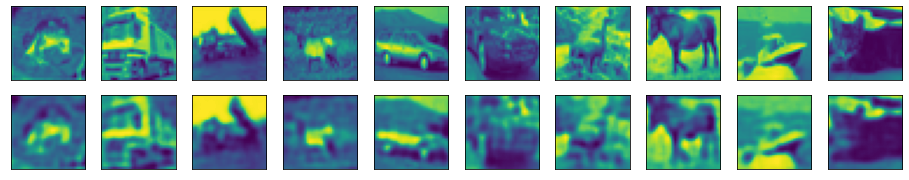

In [ ]:
n = 10
plt.figure(figsize=(16, 3))
for i in range(n):
    
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_train[i].reshape(32, 32))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_images_train[i].reshape(32, 32))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## **K-Means model creation using sparse representations**

In [ ]:
images = encoder.predict(X_train)
kmeans = KMeans(n_clusters=10).fit(images)



## **K-Means Evaluation on Test images**

In [ ]:
points = kmeans.predict(encoder.predict(X_test))
X_test = X_test.reshape(len(X_test),-1)
silhouette_score(X_test, points)

0.05348346785303402

## **K-Means Evaluation on Train images**

In [ ]:
points = kmeans.predict(encoder.predict(X_train))
X_train = X_train.reshape(len(X_train),-1)
silhouette_score(X_train, points)

0.055110550759940376